In [476]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt 
sns.set_theme()

import matplotlib
matplotlib.rcParams.update({'font.size': 15})



In [477]:
data_categories = {'SNPs':"Genomics",
                   'CNV':"Genomics",
                   'CpGs (methylation)':"Epigenetics",
                   'SNV':"Genomics",
                   'mRNA (gene expression)': "Transcriptomics",
                   'miRNA':"Epigenetics",
                   'sc-transcriptomics': "Transcriptomics",
                   'sc-ATAC':"Epigenetics",
                   'proteome': "Proteomics",
                   'clinical': "Clinical",
                   'ncRNA':"Epigenetics",
                   'other': "other",
                   'WES':"Genomics",
                   'ChIP-seq':"Epigenetics",
                   'WGS':"Genomics",
                   'genotype':"Genomics",
                   "Copy number alterations":"Genomics",
                   "Fusions":"Genomics",
                   "Mutations":"Genomics"}

model_categories = {
    'VAE':"Autoencoder",
    'VNN (dense)':"Neural network",
    'AE':"Autoencoder",
    'VAE (conditional)':"Autoencoder",
    'Graph Convolutional Network (GCN)':"Graph network",
    'AE (convolutional)':"Autoencoder",
    'LSTM (convolutional)':"Neural network",
    'ensemble (MAE)':"other",
    'fuzzy network':"other",
    'Gaussian-Proces':"other",
    'PCA-like':"other",
    'ANN':"Neural network",
    'VNN (CNN)':"Neural network",
    'AE (vector quantized)':"Autoencoder",
    'AE (stacked)':"Autoencoder",
    'VAE (sparse)':"Autoencoder",
    'Convolutional Neural Network (CNN)':"Neural network",
    'Dense neural network':"Neural network",
    #'Transformer':"",
    'Capsule Network':"other",
    'Factor Graph Neural Network':"Graph network",
    'Self-organising maps (SOM)':"other",
    'AE (sparse)':"Autoencoder",
    'Graph Network':"Graph network"
}

In [478]:
outPath = "figures"

In [479]:
pd_table1 = pd.read_csv("data/Table_3.csv")
pd_table1.columns

Index(['Name', 'Year', 'Title', 'Research question', 'Data type',
       'Bulk/single cell', 'Which level', 'Model architecture',
       'Passive vs. Active Approaches', 'Taxonomy (Table 3. Zhan et al)',
       'Post-hoc interpretation method', 'Interpretation strategy',
       'Prior knowledge', 'Computational resources used', 'Sample size',
       'Inputsize', 'handpicked', 'Advantage', 'Disadvantage', 'Notes'],
      dtype='object')

In [480]:
df_level1 = pd_table1[["Passive vs. Active Approaches"]].value_counts()
df_level1

Passive vs. Active Approaches
passive                          72
active                           35
active, passive                  14
Name: count, dtype: int64

In [481]:
pd_table1["Passive vs. Active Approaches"] == "passive"

0      False
1      False
2      False
3       True
4      False
       ...  
116     True
117     True
118    False
119    False
120     True
Name: Passive vs. Active Approaches, Length: 121, dtype: bool

In [482]:
#df_level2 = pd_table1[["Taxonomy (Table 3. Zhan et al)"]].copy()

df_level2 =  pd_table1[pd_table1["Passive vs. Active Approaches"] == "passive"].copy()
df_level2 = df_level2[["Taxonomy (Table 3. Zhan et al)"]]

df_level2["Taxonomy (Table 3. Zhan et al)"] = df_level2["Taxonomy (Table 3. Zhan et al)"].str.split(', ')
df_level2 = df_level2.explode(["Taxonomy (Table 3. Zhan et al)"])
index_attr = df_level2[df_level2["Taxonomy (Table 3. Zhan et al)"] == "attribution"].index
df_level2 = df_level2.value_counts()
df_level2.drop(["global", "local", "semi-local", "active"], axis=0, inplace=True)


# ### add extra white space to align with level1
df_level2["extra"] = round(df_level2.sum() * 0.683) 

### reorder
df_level2 = df_level2.reset_index()
df_level2.index = df_level2["Taxonomy (Table 3. Zhan et al)"].tolist()
df_level2.drop(["Taxonomy (Table 3. Zhan et al)"], axis=1, inplace=True)
df_level2 = df_level2.reindex([
                   "attribution",
                   "hidden semantics",
                   "rule",
                   "extra"])
df_level2

/tmp/ipykernel_20223/2267674397.py:10: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_level2.drop(["global", "local", "semi-local", "active"], axis=0, inplace=True)


,count
attribution,64
hidden semantics,15
rule,6
extra,58


In [483]:
df_level3 = pd_table1.iloc[index_attr,:].copy()

df_level3 = df_level3[["Interpretation strategy"]]
df_level3["Interpretation strategy"] = df_level3["Interpretation strategy"].str.split(', ')
df_level3 = df_level3.explode(["Interpretation strategy"])
df_level3 = df_level3.value_counts()
df_level3.drop(["prior knowledge", "connection-weights"], axis=0, inplace=True)

# ### add extra white space to align with level1
df_level3["extra"] = df_level3.sum()+9

df_level3 = df_level3.reset_index()
df_level3.index = df_level3["Interpretation strategy"].tolist()
df_level3.drop(["Interpretation strategy"], axis=1, inplace=True)
df_level3 = df_level3.reindex([
                   "backpropagation-based",
                   "other",
                   "game theory",
                   "perturbation",
                   "permutation",
                   "extra"])
df_level3

/tmp/ipykernel_20223/3844478510.py:7: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_level3.drop(["prior knowledge", "connection-weights"], axis=0, inplace=True)


,count
backpropagation-based,30
other,7
game theory,16
perturbation,9
permutation,2
extra,79


In [484]:
''' Prepare colors '''
size = 0.5
basecol = 140
level1_colors = []
level2_colors = []
level3_colors = []


for i, cm in enumerate(["Reds", "Blues", "Purples"]):
    cmap = plt.colormaps[cm]
    level1_colors.append(cmap(basecol))
for i, cm in enumerate(["Reds", "Purples", "Greens"]):    
    cmap = plt.colormaps[cm]
    level2_colors.append(cmap(basecol))
level2_colors.append(np.array([[1,1,1,1]]))
for i, cm in enumerate(["Blues", "Oranges", "Greens","Reds", "Purples"]):    
    cmap = plt.colormaps[cm]
    level3_colors.append(cmap(basecol))
level3_colors.append(np.array([[1,1,1,1]]))

[<matplotlib.patches.Wedge object at 0x7fb3509a1e90>, <matplotlib.patches.Wedge object at 0x7fb350a0b3d0>, <matplotlib.patches.Wedge object at 0x7fb3509cf410>, [<matplotlib.patches.Wedge object at 0x7fb353edf1d0>, <matplotlib.patches.Wedge object at 0x7fb3509dd9d0>, <matplotlib.patches.Wedge object at 0x7fb3509dea50>, <matplotlib.patches.Wedge object at 0x7fb3509dfb10>]]
[<matplotlib.patches.Wedge object at 0x7fb3509a1e90>, <matplotlib.patches.Wedge object at 0x7fb350a0b3d0>, <matplotlib.patches.Wedge object at 0x7fb3509cf410>, [<matplotlib.patches.Wedge object at 0x7fb353edf1d0>, <matplotlib.patches.Wedge object at 0x7fb3509dd9d0>, <matplotlib.patches.Wedge object at 0x7fb3509dea50>, <matplotlib.patches.Wedge object at 0x7fb3509dfb10>], [<matplotlib.patches.Wedge object at 0x7fb350bae010>, <matplotlib.patches.Wedge object at 0x7fb3509e9f10>, <matplotlib.patches.Wedge object at 0x7fb3509eb0d0>, <matplotlib.patches.Wedge object at 0x7fb3509ebf90>, <matplotlib.patches.Wedge object at 0x7

/tmp/ipykernel_20223/2954775663.py:14: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(patches_level1,


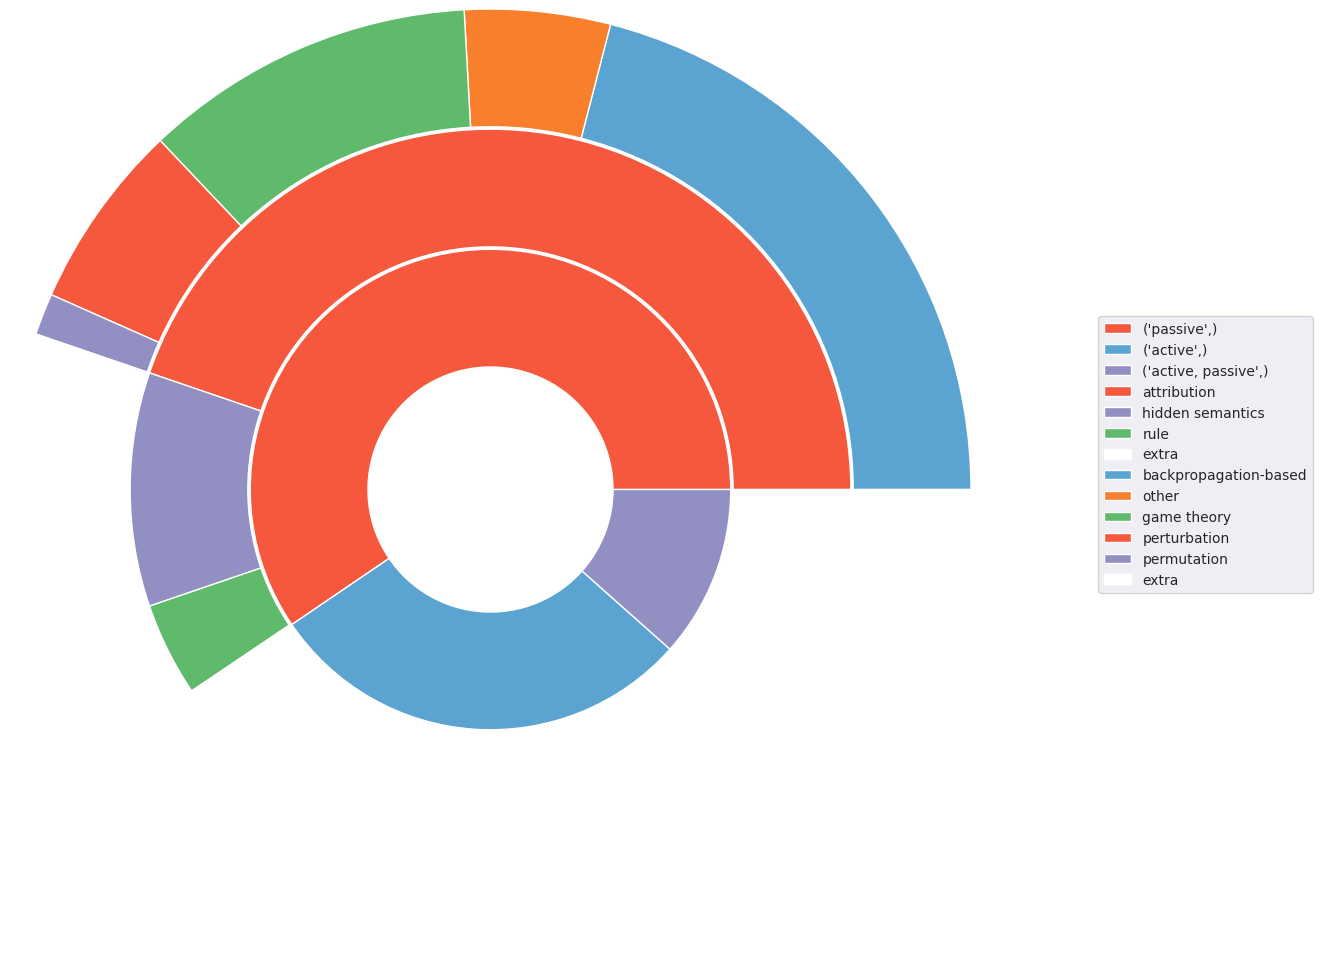

In [485]:
fig, ax = plt.subplots(figsize=(18,12))
patches_level1, labels = ax.pie(df_level1, radius=1, wedgeprops=dict(width=size-0.01, edgecolor='w'), colors=level1_colors)#, labels=df_level1.index.tolist()) 
                                  #autopct='%1.1f%%', pctdistance=.7, labeldistance=.6)
patches_level2, labels = ax.pie(df_level2.iloc[:,0], radius=1+size, wedgeprops=dict(width=size-0.01, edgecolor='w'), colors=level2_colors)#, labels=df_level2.index)

patches_level3, labels = ax.pie(df_level3.iloc[:,0], radius=1.5+size, wedgeprops=dict(width=size-0.01, edgecolor='w'), colors=level3_colors)#, labels=df_level3.index) #

patches_level1.append(patches_level2)
print(patches_level1)
patches_level1.append(patches_level3)
print(patches_level1)

#ax.legend(bbox_to_anchor=(1.03, 1.02))
ax.legend(patches_level1, 
          labels=df_level1.index.tolist()+df_level2.index.tolist() +df_level3.index.tolist(), 
           bbox_to_anchor=(1.5, 0.8), fontsize=10)

plt.tight_layout()
plt.savefig(f"{outPath}/dim1+dim2.svg", dpi=300)

# Attribution strategy and model type

In [610]:
df_attr_model = pd_table1.iloc[index_attr,:].copy()

In [611]:
df_attr_model["interpretation_strat"] = df_attr_model['Interpretation strategy'].str.split(', ')
df_attr_model["model_architecture"] = df_attr_model['Model architecture'].str.split(', ')

df_attr_model = df_attr_model.explode(["interpretation_strat"])
df_attr_model = df_attr_model.explode(["model_architecture"])

''' change naming '''
df_attr_model["model_architecture"] = df_attr_model["model_architecture"].replace(model_categories)
df_attr_model["model_architecture"] = df_attr_model["model_architecture"].values.astype(str)
df_attr_model["interpretation_strat"] = df_attr_model["interpretation_strat"].values.astype(str)



df_attr_model = df_attr_model.sort_values(["model_architecture"], ascending=True)

### remove unwanted things
df_attr_model.replace("connection-weights", np.nan, inplace=True)
df_attr_model.replace("prior knowledge", np.nan, inplace=True)
df_attr_model = df_attr_model[~df_attr_model["interpretation_strat"].isna()]

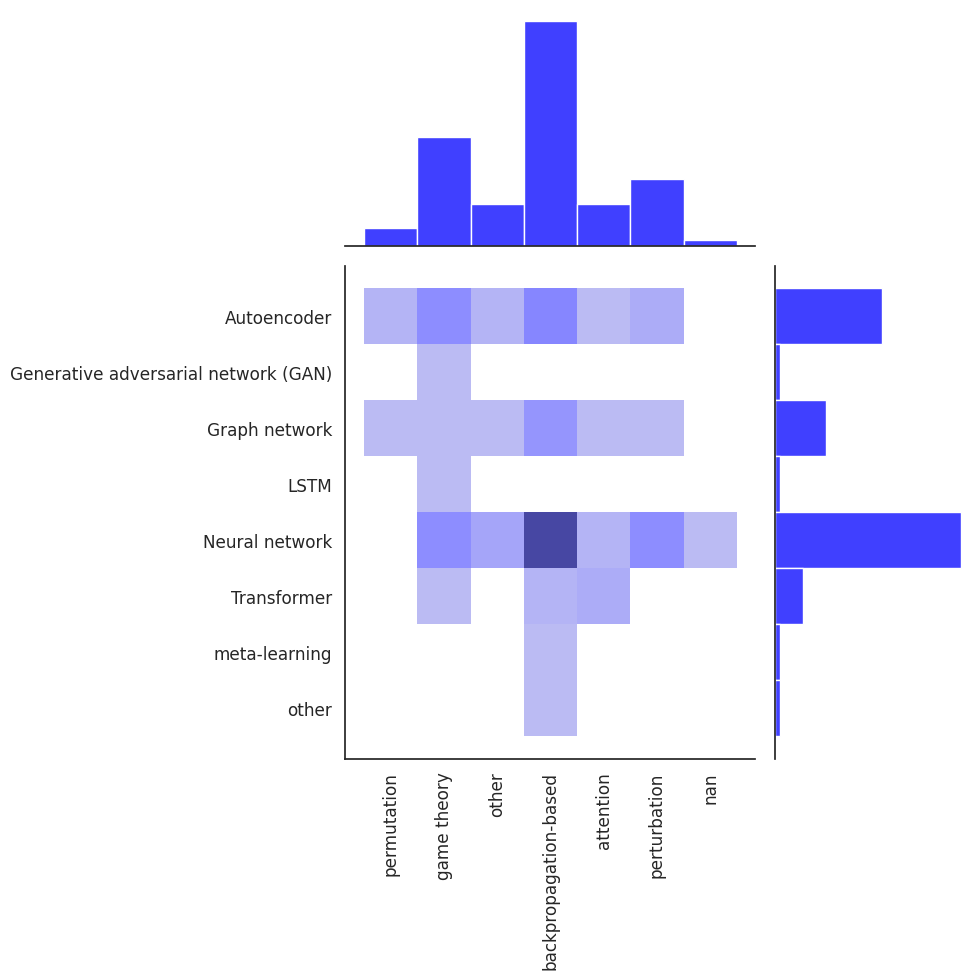

In [625]:
sns.set_theme(style="white", palette="pastel", font_scale=1.1)
### Ploting
#fig, ax = plt.subplots(ncols=1, figsize=(6,6))
ax = sns.jointplot(df_attr_model, x="interpretation_strat", y ="model_architecture", color="blue", kind="hist", ratio=2, height=10)   #hist
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.savefig("figures/jointplot_attr_model.svg", dpi=300)

In [631]:
a = df_attr_model.loc[:,["model_architecture","interpretation_strat"]].copy()
a = a.value_counts(normalize=False)
order_1 = ['attention','backpropagation-based','game theory', 'other', 'permutation', 'perturbation']
order_2 = ['Transformer', 'other', 'Neural network', 'meta-learning', 'LSTM', 'Graph network',  'Generative adversarial network (GAN)', 'Autoencoder']

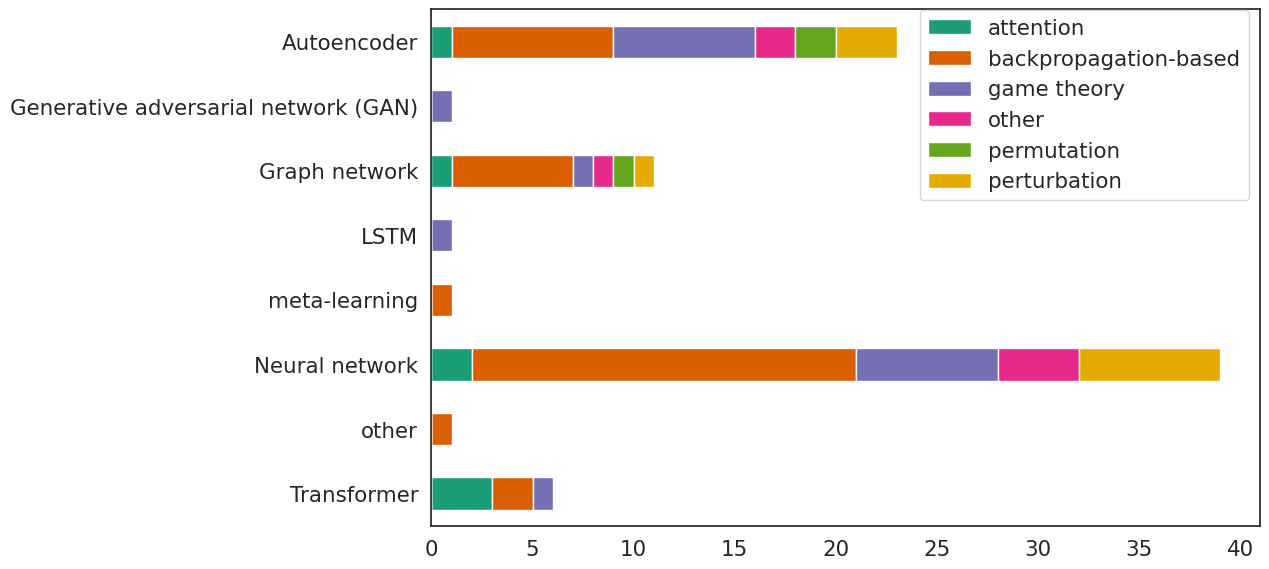

In [635]:
sns.set_theme(style="white", palette="Dark2", font_scale=1.4)

fig, ax = plt.subplots(ncols=1, figsize=(13,6))
a.unstack().loc[order_2,order_1].plot.barh(stacked=True, ax=ax)
ax.legend(bbox_to_anchor=(1., 1.02))
ax.set_ylabel("")
plt.tight_layout()
plt.savefig("figures/vbar_attr_model.svg", dpi=300)

In [584]:
a = df_attr_model.loc[:,["interpretation_strat", "model_architecture"]].copy()
a = a.value_counts(normalize=False)
order_1 = ['attention','backpropagation-based','game theory', 'other', 'permutation', 'perturbation']
order_2 = ['Transformer', 'other', 'Neural network', 'meta-learning', 'LSTM', 'Graph network',  'Generative adversarial network (GAN)', 'Autoencoder']

Text(0, 0.5, '')

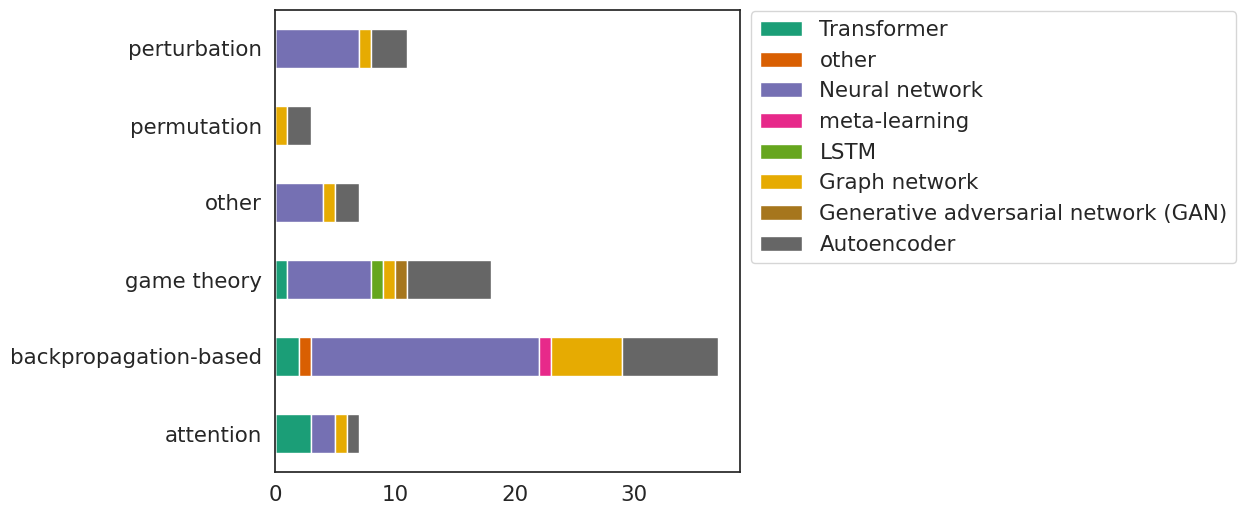

In [585]:
sns.set_theme(style="white", palette="Dark2", font_scale=1.4)

fig, ax = plt.subplots(ncols=1, figsize=(6,6))
a.unstack().loc[order_1,order_2].plot.barh(stacked=True, ax=ax)
ax.legend(bbox_to_anchor=(1., 1.02))
ax.set_ylabel("")

# Attribution strategy and data type

In [606]:
df_attr_data = pd_table1.iloc[index_attr,:].copy()

In [607]:
df_attr_data["interpretation_strat"] = df_attr_data['Interpretation strategy'].str.split(', ')
df_attr_data["data_type"] = df_attr_data['Data type'].str.split(', ')

df_attr_data = df_attr_data.explode(["interpretation_strat"])
df_attr_data = df_attr_data.explode(["data_type"])

''' change naming '''
df_attr_data["data_type"] = df_attr_data["data_type"].replace(data_categories)
df_attr_data["data_type"] = df_attr_data["data_type"].values.astype(str)
df_attr_data["interpretation_strat"] = df_attr_data["interpretation_strat"].values.astype(str)


df_attr_data = df_attr_data.sort_values(["data_type"], ascending=True)

### remove unwanted things
df_attr_data.replace("connection-weights", np.nan, inplace=True)
df_attr_data.replace("prior knowledge", np.nan, inplace=True)
df_attr_data = df_attr_data[~df_attr_data["interpretation_strat"].isna()]

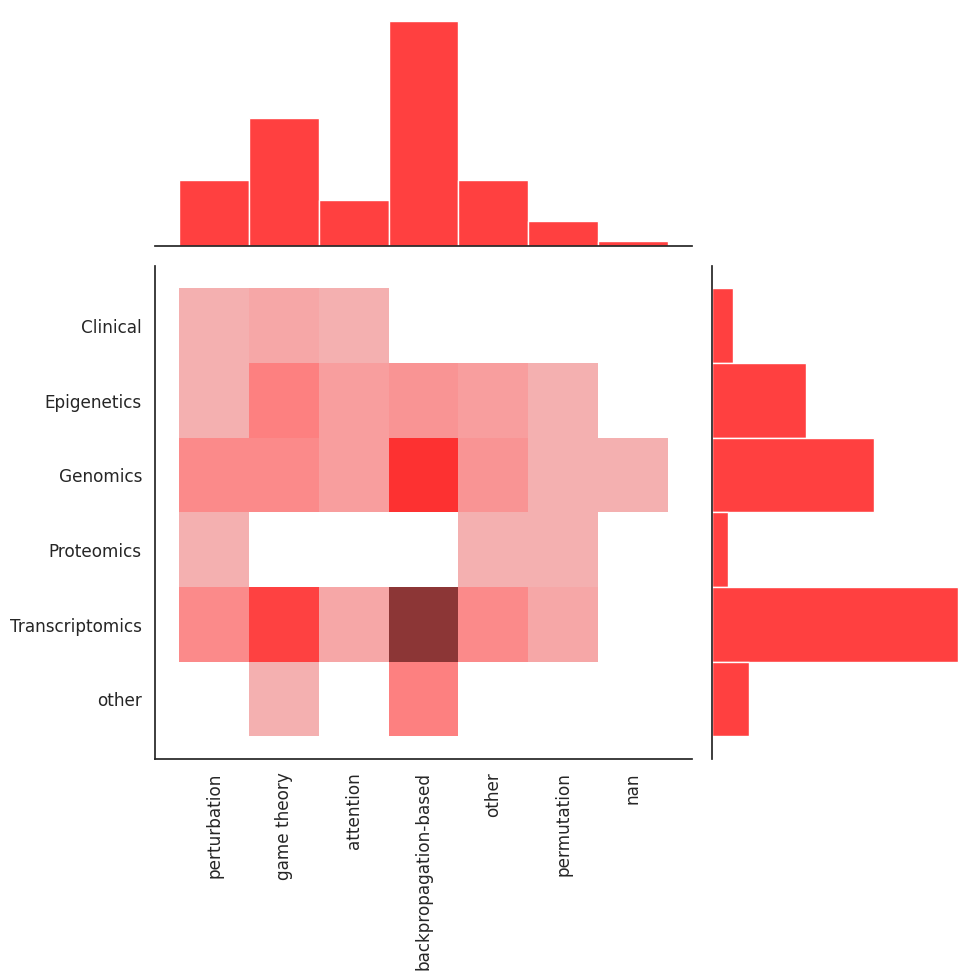

In [630]:
sns.set_theme(style="white", palette="pastel", font_scale=1.1)
### Ploting
#fig, ax = plt.subplots(ncols=1, figsize=(6,6))
ax = sns.jointplot(df_attr_data, x="interpretation_strat", y ="data_type", color="red", kind="hist", ratio=2, height=10)   #hist
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.savefig("figures/jointplot_attr_data.svg", dpi=300)

In [609]:
b = df_attr_data.loc[:,["interpretation_strat", "data_type"]].copy()
b = b.value_counts(normalize=True)
b.unstack()

data_type,Clinical,Epigenetics,Genomics,Proteomics,Transcriptomics,other
interpretation_strat,,,,,,
attention,0.009091,0.027273,0.027273,NaN,0.018182,NaN
backpropagation-based,NaN,0.036364,0.109091,NaN,0.200000,0.054545
game theory,0.018182,0.054545,0.045455,NaN,0.100000,0.009091
nan,NaN,NaN,0.009091,NaN,NaN,NaN
other,NaN,0.027273,0.036364,0.009091,0.045455,NaN
permutation,NaN,0.009091,0.009091,0.009091,0.018182,NaN
perturbation,0.009091,0.009091,0.045455,0.009091,0.045455,NaN
